In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline

fluorescence = pd.read_excel("17_Plate_Concentrations.xlsx", 
                          sheetname="MAA000367", 
                          skiprows=2,
                          parse_cols="C:Z",
                           skip_footer=409)
fluorescence.index = list('ABCDEFGHIJKLMNOP')
print(fluorescence.shape)
fluorescence

(16, 24)


,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
A,179921,450084,632934,335972,691634,583653,195665,511019,993424,1136470,...,1388442,1067917,581260,726639,1328468,485746,1051109,839995,956755,3052450
B,446113,344495,266444,532195,504175,401110,655497,594414,999464,1593458,...,359682,885705,692774,704239,522324,791588,642778,786235,410593,3255739
C,326636,232450,708466,555815,502594,203939,704636,436747,1438677,1096481,...,357105,1209338,643011,768730,692691,844739,665862,545590,371289,3165071
D,462485,349877,838393,528034,611372,381431,745942,260438,1065470,934817,...,1020734,1079783,295759,552657,506702,720170,945428,642664,370907,3280401
E,398800,381726,401910,523756,824761,771488,981250,661133,1373007,1175475,...,858552,1140013,475969,590278,685939,371194,737957,693542,765517,2136979
F,258417,224976,341484,314021,339621,500732,1121030,492475,1231883,214944,...,1186676,1324995,314896,598511,363203,621202,927490,1192831,479370,2192175
G,382126,277528,871970,955746,381698,302662,672223,528694,1074079,640732,...,1278479,1038013,905578,419346,876963,474722,623399,487308,534350,1158047
H,277561,265682,753325,422189,514915,236928,479082,282655,673506,411118,...,909879,451560,547256,216390,492094,520102,520206,876016,896903,1171872
I,418344,366386,320908,293330,1408833,292469,804799,326090,392817,335991,...,672667,1285731,858409,523893,862373,901382,304135,597360,830807,585591
J,391892,373760,433466,358274,207761,346072,884074,467549,523620,1184622,...,950850,986421,315066,507203,402513,358340,634028,354451,658764,570241


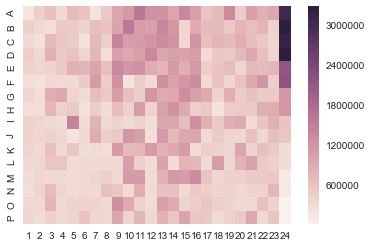

In [4]:
sns.heatmap(fluorescence)

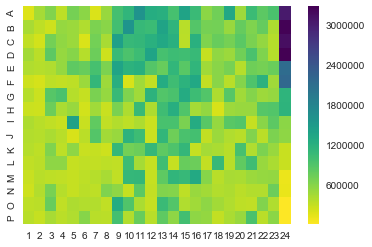

In [5]:
sns.heatmap(fluorescence, cmap='viridis_r')

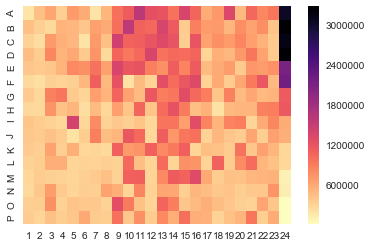

In [6]:
sns.heatmap(fluorescence, cmap='magma_r')

In [8]:
standards = [8, 8, 6, 6, 4, 4, 2, 2, 1, 1, 0.5, 0.5, 0.025, 0.025, 0, 0]
len(standards)

16

In [10]:
# Access the standards column

fluorescence[24]

A    3052450
B    3255739
C    3165071
D    3280401
E    2136979
F    2192175
G    1158047
H    1171872
I     585591
J     570241
K     282350
L     288657
M     115038
N     115314
O      13790
P      13137
Name: 24, dtype: int64

In [11]:
# the magic of groupby!!

column = fluorescence[24]
column

A    3052450
B    3255739
C    3165071
D    3280401
E    2136979
F    2192175
G    1158047
H    1171872
I     585591
J     570241
K     282350
L     288657
M     115038
N     115314
O      13790
P      13137
Name: 24, dtype: int64

In [12]:
column.groupby(standards)

In [14]:
standards

[8, 8, 6, 6, 4, 4, 2, 2, 1, 1, 0.5, 0.5, 0.025, 0.025, 0, 0]

In [16]:
means = column.groupby(standards).mean()
means

0.000      13463.5
0.025     115176.0
0.500     285503.5
1.000     577916.0
2.000    1164959.5
4.000    2164577.0
6.000    3222736.0
8.000    3154094.5
Name: 24, dtype: float64

In [15]:
# Sanity check that the mean for "8" worked
(3052450 + 3255739)/2

3154094.5

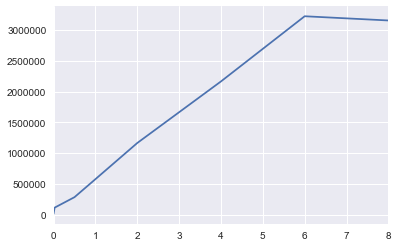

In [18]:
means.plot()

In [19]:
standards_to_use = [6, 4, 2, 1, 0.5]

In [20]:
means[standards_to_use]

6.0    3222736.0
4.0    2164577.0
2.0    1164959.5
1.0     577916.0
0.5     285503.5
Name: 24, dtype: float64

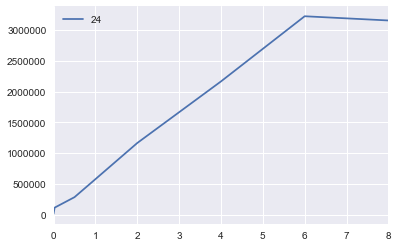

In [21]:
means.plot(legend=True)

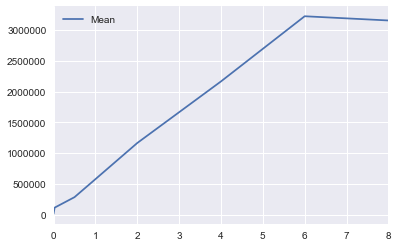

In [22]:
means.name = "Mean"
means.plot(legend=True)

In [23]:
from scipy.stats import linregress
linregress?

In [25]:
regressed = linregress(means[standards_to_use], standards_to_use)
regressed

LinregressResult(slope=1.8856970581425632e-06, intercept=-0.096749717698267901, rvalue=0.99966172070351256, pvalue=7.4683548946695901e-06, stderr=2.8325279876764978e-08)

In [26]:
# This value is the correlation coefficient R, 
# not the R^2 goodness of fit for linear regressino
regressed.rvalue ** 2

0.99932355583990751

In [28]:
concentrations = fluorescence * regressed.slope + regressed.intercept
concentrations

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
A,0.242527,0.751972,1.096772,0.536792,1.207462,1.003843,0.272215,0.866877,1.776547,2.046288,...,2.521431,1.917018,0.999331,1.273471,2.408338,0.819220,1.885323,1.487226,1.707400,5.659246
B,0.744484,0.552863,0.405683,0.906809,0.853972,0.659622,1.139319,1.024135,1.787937,2.908029,...,0.581502,1.573422,1.209612,1.231232,0.888195,1.395945,1.115335,1.385851,0.677504,6.042588
C,0.519187,0.341581,1.239203,0.951349,0.850990,0.287817,1.231980,0.726823,2.616159,1.970881,...,0.576642,2.183695,1.115774,1.352842,1.209456,1.496172,1.158864,0.932068,0.603389,5.871615
D,0.775357,0.563012,1.484205,0.898962,1.056113,0.622514,1.309871,0.394357,1.912404,1.666032,...,1.828045,1.939394,0.460962,0.945394,0.858737,1.261273,1.686041,1.115120,0.602669,6.089093
E,0.655266,0.623070,0.661131,0.890895,1.458500,1.358043,1.753591,1.149947,2.492326,2.119840,...,1.522219,2.052969,0.800784,1.016336,1.196723,0.603210,1.294814,1.211060,1.346783,3.932945
F,0.390546,0.327487,0.547186,0.495399,0.543673,0.847479,2.017173,0.831909,2.226208,0.308570,...,2.140962,2.401789,0.497049,1.031861,0.588141,1.074649,1.652215,2.152568,0.807197,4.037028
G,0.623824,0.426584,1.547522,1.705498,0.623017,0.473979,1.170859,0.900207,1.928638,1.111477,...,2.314074,1.860628,1.610896,0.694010,1.556937,0.798432,1.078792,0.822166,0.910873,2.086976
H,0.426646,0.404246,1.323793,0.699371,0.874224,0.350025,0.806654,0.436252,1.173279,0.678494,...,1.619006,0.754756,0.935209,0.311296,0.831190,0.884005,0.884201,1.555151,1.594538,2.113046
I,0.692120,0.594143,0.508386,0.456382,2.559883,0.454758,1.420857,0.518157,0.643984,0.536828,...,1.171696,2.327749,1.521950,0.891154,1.529425,1.602984,0.476757,1.029690,1.469901,1.007498
J,0.642240,0.608048,0.720636,0.578847,0.295025,0.555837,1.570346,0.784906,0.890639,2.137089,...,1.696265,1.763341,0.497369,0.859681,0.662268,0.578971,1.098835,0.571637,1.145480,0.978552


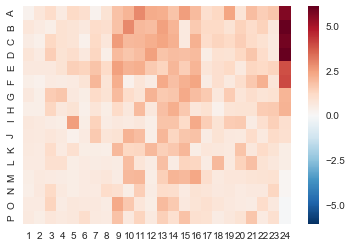

In [30]:
sns.heatmap(concentrations)

In [31]:
# Get only the samples whose concentrations are high enough

concentrations[23]

A    1.707400
B    0.677504
C    0.603389
D    0.602669
E    1.346783
F    0.807197
G    0.910873
H    1.594538
I    1.469901
J    1.145480
K    0.873998
L    0.710708
M    0.919068
N    1.311847
O    0.654220
P    0.992472
Name: 23, dtype: float64

In [33]:
average_blanks = concentrations[23].mean()
average_blanks

1.0205028073183047

In [34]:
stddev_blanks = concentrations[23].std()
stddev_blanks

0.36484453315843896

In [35]:
minimum_concentration = average_blanks + stddev_blanks
minimum_concentration

1.3853473404767436

In [40]:
without_blanks_or_standards = concentrations.iloc[:, :22]
without_blanks_or_standards

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
A,0.242527,0.751972,1.096772,0.536792,1.207462,1.003843,0.272215,0.866877,1.776547,2.046288,...,2.207482,1.751763,2.521431,1.917018,0.999331,1.273471,2.408338,0.819220,1.885323,1.487226
B,0.744484,0.552863,0.405683,0.906809,0.853972,0.659622,1.139319,1.024135,1.787937,2.908029,...,2.506402,2.077397,0.581502,1.573422,1.209612,1.231232,0.888195,1.395945,1.115335,1.385851
C,0.519187,0.341581,1.239203,0.951349,0.850990,0.287817,1.231980,0.726823,2.616159,1.970881,...,2.398020,2.174195,0.576642,2.183695,1.115774,1.352842,1.209456,1.496172,1.158864,0.932068
D,0.775357,0.563012,1.484205,0.898962,1.056113,0.622514,1.309871,0.394357,1.912404,1.666032,...,1.752938,1.865162,1.828045,1.939394,0.460962,0.945394,0.858737,1.261273,1.686041,1.115120
E,0.655266,0.623070,0.661131,0.890895,1.458500,1.358043,1.753591,1.149947,2.492326,2.119840,...,1.366429,2.030449,1.522219,2.052969,0.800784,1.016336,1.196723,0.603210,1.294814,1.211060
F,0.390546,0.327487,0.547186,0.495399,0.543673,0.847479,2.017173,0.831909,2.226208,0.308570,...,2.302134,1.852658,2.140962,2.401789,0.497049,1.031861,0.588141,1.074649,1.652215,2.152568
G,0.623824,0.426584,1.547522,1.705498,0.623017,0.473979,1.170859,0.900207,1.928638,1.111477,...,1.612271,1.695873,2.314074,1.860628,1.610896,0.694010,1.556937,0.798432,1.078792,0.822166
H,0.426646,0.404246,1.323793,0.699371,0.874224,0.350025,0.806654,0.436252,1.173279,0.678494,...,1.853242,2.219139,1.619006,0.754756,0.935209,0.311296,0.831190,0.884005,0.884201,1.555151
I,0.692120,0.594143,0.508386,0.456382,2.559883,0.454758,1.420857,0.518157,0.643984,0.536828,...,1.715605,1.724951,1.171696,2.327749,1.521950,0.891154,1.529425,1.602984,0.476757,1.029690
J,0.642240,0.608048,0.720636,0.578847,0.295025,0.555837,1.570346,0.784906,0.890639,2.137089,...,2.041812,1.288387,1.696265,1.763341,0.497369,0.859681,0.662268,0.578971,1.098835,0.571637


In [42]:
where_good_samples_are = without_blanks_or_standards > minimum_concentration
where_good_samples_are

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
A,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,False,False,True,False,True,True
B,False,False,False,False,False,False,False,False,True,True,...,True,True,False,True,False,False,False,True,False,True
C,False,False,False,False,False,False,False,False,True,True,...,True,True,False,True,False,False,False,True,False,False
D,False,False,True,False,False,False,False,False,True,True,...,True,True,True,True,False,False,False,False,True,False
E,False,False,False,False,True,False,True,False,True,True,...,False,True,True,True,False,False,False,False,False,False
F,False,False,False,False,False,False,True,False,True,False,...,True,True,True,True,False,False,False,False,True,True
G,False,False,True,True,False,False,False,False,True,False,...,True,True,True,True,True,False,True,False,False,False
H,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,True
I,False,False,False,False,True,False,True,False,False,False,...,True,True,False,True,True,False,True,True,False,False
J,False,False,False,False,False,False,True,False,False,True,...,True,False,True,True,False,False,False,False,False,False


In [44]:
good_samples = without_blanks_or_standards[where_good_samples_are]

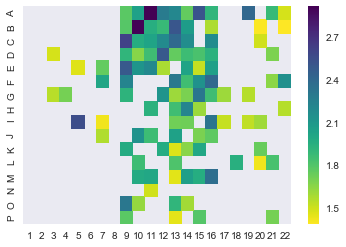

In [46]:
sns.heatmap(good_samples, cmap='viridis_r')

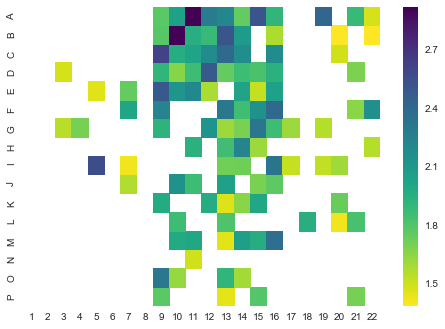

In [47]:
sns.set(style='white')
sns.heatmap(good_samples, cmap='viridis_r')

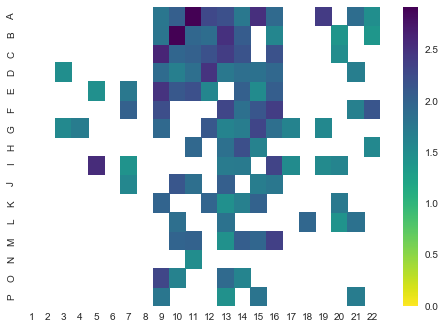

In [48]:
# set minimum value in heatmap to be zero
sns.heatmap(good_samples, cmap='viridis_r', vmin=0)

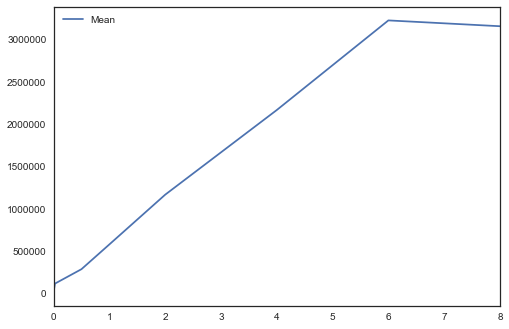

In [49]:
means.plot(legend=True)

In [50]:
means[standards_to_use]

6.0    3222736.0
4.0    2164577.0
2.0    1164959.5
1.0     577916.0
0.5     285503.5
Name: Mean, dtype: float64

In [52]:
standards_to_use

[6, 4, 2, 1, 0.5]

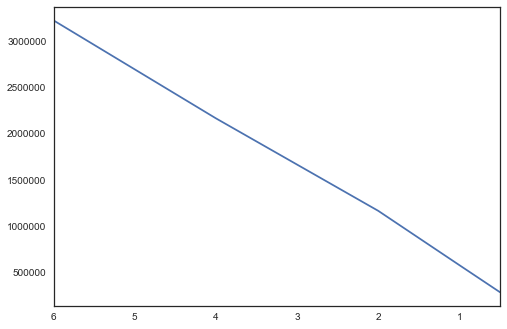

In [54]:
means[[6, 4, 2, 1, 0.5]].plot()

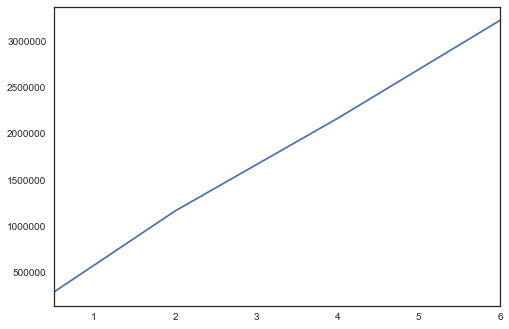

In [55]:
means[[0.5, 1, 2, 4, 6]].plot()

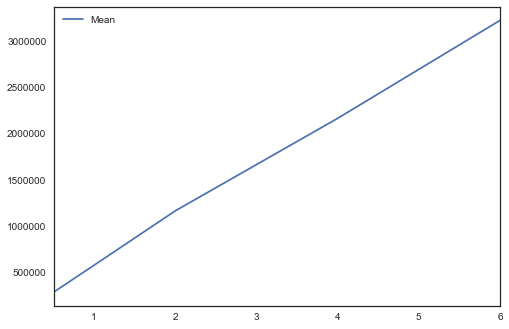

In [57]:
means[reversed(standards_to_use)].plot(legend=True)

In [59]:
means

0.000      13463.5
0.025     115176.0
0.500     285503.5
1.000     577916.0
2.000    1164959.5
4.000    2164577.0
6.000    3222736.0
8.000    3154094.5
Name: Mean, dtype: float64

In [62]:
y = means * regressed.slope + regressed.intercept
y.name = 'Regressed'
y

0.000   -0.071362
0.025    0.120437
0.500    0.441623
1.000    0.993025
2.000    2.100011
4.000    3.984987
6.000    5.980354
8.000    5.850917
Name: Regressed, dtype: float64

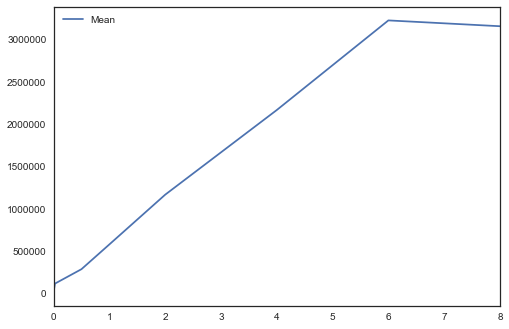

In [65]:
means.plot(legend=True)

In [67]:
concentrations[24].groupby(standards).mean()

0.000   -0.071362
0.025    0.120437
0.500    0.441623
1.000    0.993025
2.000    2.100011
4.000    3.984987
6.000    5.980354
8.000    5.850917
Name: 24, dtype: float64